In [1]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.pyplot as plt; plt.rcdefaults()

from pathlib import Path

In [2]:
# parameter names of the statistics we want to show
params = ["Goal", "Assist", "Touches",
          "Passes Attempts", "Passes Success Rate", "Progressive Passes", 
          "Take Ons Attempts", "Take Ons Success Rate", "Aerial Won"]

# The lower and upper boundaries for the statistics
low =  [0, 0, 20, 20, 0, 5,  4, 0, 0]
high = [6, 5, 80, 80, 1, 30, 10, 1, 5]

# Add anything to this list where having a lower number is better
# this flips the statistic
#lower_is_better = ['Miscontrols']

In [3]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [4]:
fpath = Path(mpl.get_data_path(), "fonts/ttf/MYRIADPRO-BOLD.otf")

In [6]:
mason_values = [3, 1, 30, 20, 0.6, 15, 5, 0.8, 2]
bruno_values = [4, 1, 50, 10, 0.3, 20, 2, 0.7, 1]

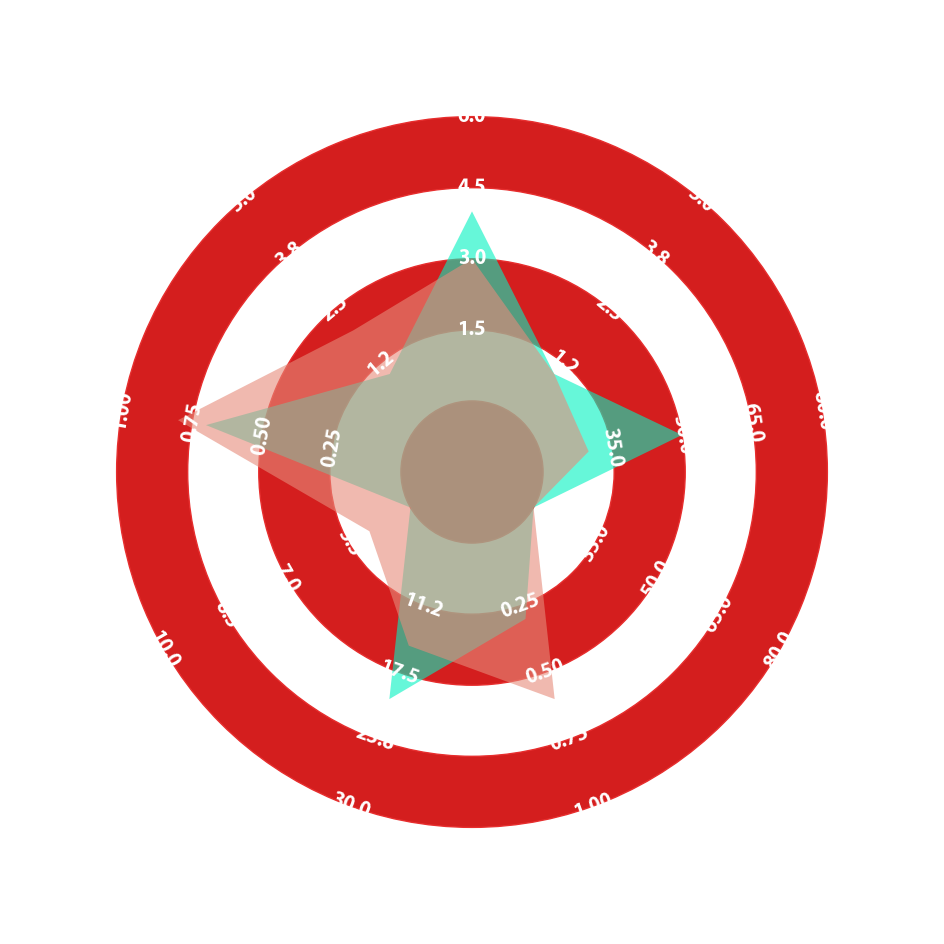

In [11]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#D41E1E', edgecolor='#E72E2E')  # draw circles
radar_output = radar.draw_radar_compare(bruno_values, mason_values, ax=ax,
                                        kwargs_radar={'facecolor': '#00F2C1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#E68B7A', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=fpath,
                                       color = 'White')
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=fpath,
                                       color = 'White')

plt.savefig('compare_radar_viz.png', dpi = 100, transparent = True)